## Name : Manavi J Kamble
# The Sparks Foundation GRIP Internship
## Task 2 - Prediction using Unsupervised ML
In this task there are some of the basics of K-Means Clustering. From the given dataset predict the optimum number of clusters and represent it visually.

## Importing the Libraries.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Importing Iris Dataset

In [8]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Finding the optimum number of clusters.

In [11]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []  # WCSS : Within-Cluster Sum of Square it is the sum of squared distance between each point and the centroid in a cluster

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting the results onto a line graph

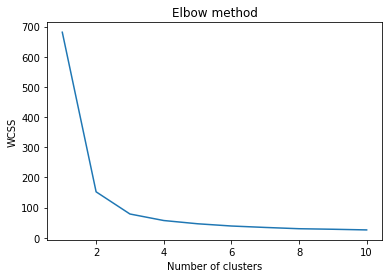

In [21]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.title('Elbow method')
plt.ylabel('WCSS') 
plt.show()

## We select the number of clusters as ' 3 ' 

## Applying kmeans to the dataset 

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters

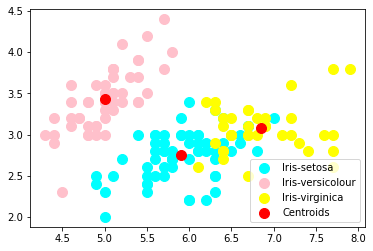

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()